In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [26]:
df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


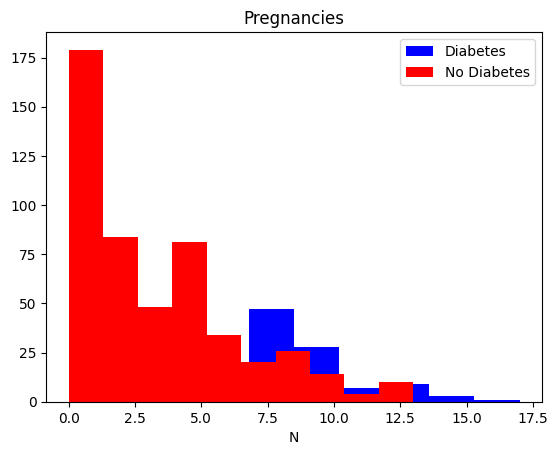

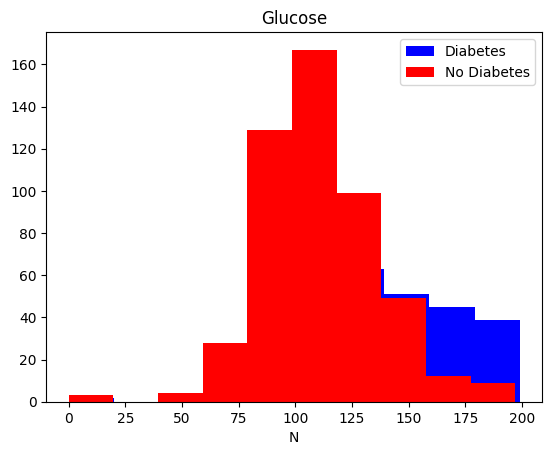

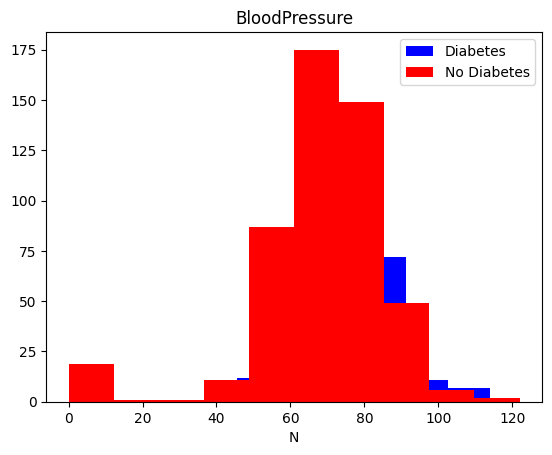

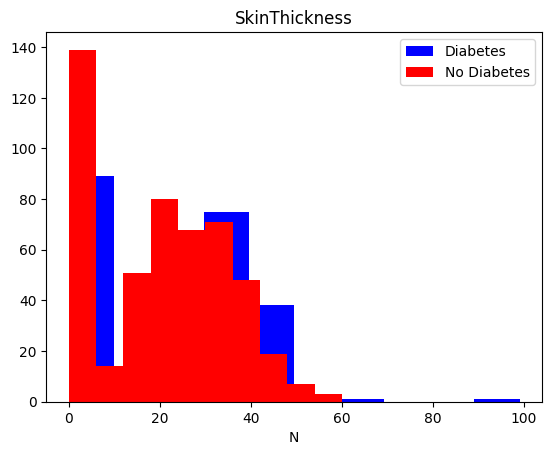

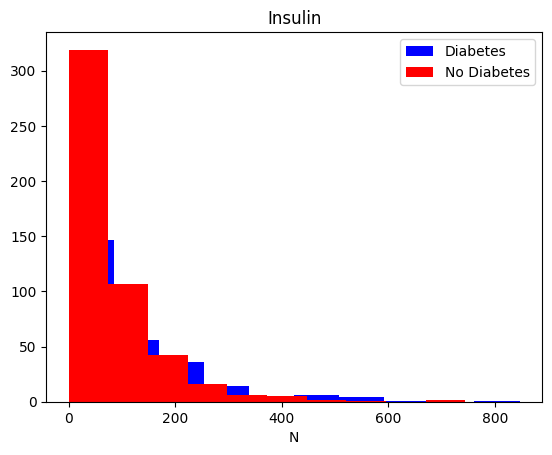

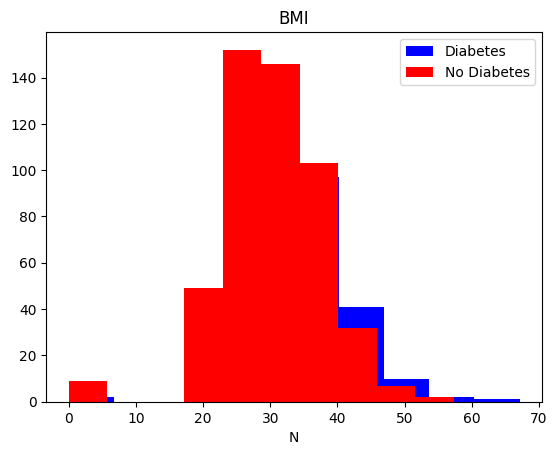

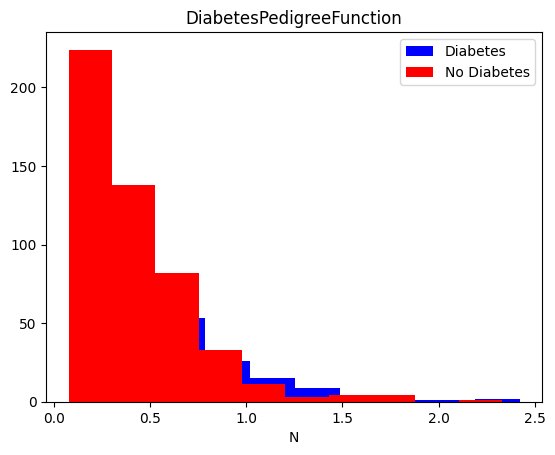

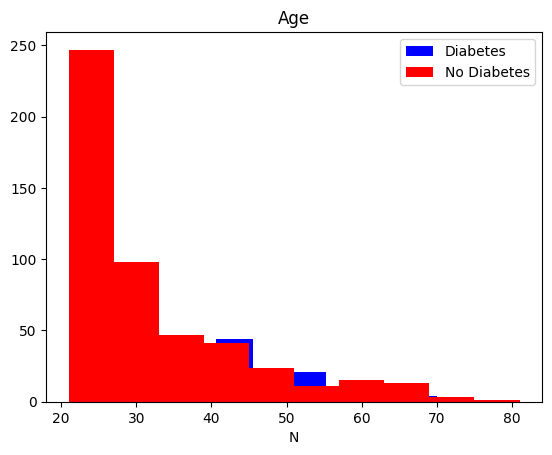

In [27]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome']==1][label],color = 'blue', label = 'Diabetes')
    plt.hist(df[df['Outcome']==0][label],color = 'red',label = 'No Diabetes')
    plt.title(label)
    plt.xlabel(label)
    plt.xlabel('N')
    plt.legend()
    plt.show()

In [28]:
X = df[df.columns[:-1]].values
Y = df[df.columns[-1]].values

In [32]:
X = np.array(X)
Y = np.array(Y)
X


array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [30]:
Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [13]:
print(str(X.shape))
print(str(Y.shape))


(768, 8)
(768,)


In [37]:
model = tf.keras.Sequential(
    [
        
        tf.keras.layers.Dense(units = 16, activation = 'relu'),
        tf.keras.layers.Dense(units = 16, activation = 'relu'),
        tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
    ]
)

In [38]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,Y,
    epochs = 20
)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - loss: 12.6819
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.5514 
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9271 
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 1.2177
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 1.0271
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.8956
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8412 
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 0.8190
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 0.8447
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7562 
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6903 
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 0.6789
Epoch 13/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6433 
Epoch 14/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 0.6377
Epoch 15/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 0.